In [1]:
#importation of necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load Housing Data
raw_data = pd.read_csv('dataset/Housing_dataset_train.csv')
test_data = pd.read_csv('dataset/Housing_dataset_test.csv')
submission = pd.read_csv("dataset/Sample_submission.csv")

# Basic Data Exploration

In [3]:
raw_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14000 non-null  int64  
 1   loc            12187 non-null  object 
 2   title          12278 non-null  object 
 3   bedroom        12201 non-null  float64
 4   bathroom       12195 non-null  float64
 5   parking_space  12189 non-null  float64
 6   price          14000 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 765.8+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             6000 non-null   int64 
 1   loc            6000 non-null   object
 2   title          6000 non-null   object
 3   bedroom        6000 non-null   int64 
 4   bathroom       6000 non-null   int64 
 5   parking_space  6000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 281.4+ KB


In [6]:
raw_data.describe()

,ID,bedroom,bathroom,parking_space,price
count,14000.000000,12201.000000,12195.000000,12189.000000,1.400000e+04
mean,4862.700357,4.308171,3.134235,3.169825,2.138082e+06
std,3818.348214,2.441165,2.035950,1.599415,1.083057e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.750000,2.000000,1.000000,2.000000,1.393990e+06
50%,3527.000000,4.000000,2.000000,3.000000,1.895223e+06
75%,8011.250000,6.000000,5.000000,4.000000,2.586699e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


# Data Cleaning

In [7]:
#drop columns not needed
raw_data.dropna(subset=['loc', 'title'], inplace=True)
raw_data.reset_index()

,index,ID,loc,title,bedroom,bathroom,parking_space,price
0,0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
3,4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
4,5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...,...
10526,13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
10527,13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
10528,13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
10529,13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [8]:
#check for duplicated rows
raw_data.duplicated().sum()

0

In [10]:
#check for null values
raw_data.isnull().sum()

ID                  0
loc                 0
title               0
bedroom          1675
bathroom         1672
parking_space    1671
price               0
dtype: int64

In [11]:
raw_data.groupby(['title', 'loc'])[['bedroom', 'bathroom', 'parking_space']].mean().round(0)

bedroom  bathroom  parking_space
title     loc                                        
Apartment Abia           5.0       3.0            4.0
          Adamawa        4.0       3.0            3.0
          Akwa Ibom      4.0       3.0            4.0
          Anambra        4.0       2.0            3.0
          Bauchi         3.0       3.0            3.0
...                      ...       ...            ...
Townhouse Rivers         4.0       3.0            3.0
          Sokoto         4.0       3.0            3.0
          Taraba         6.0       3.0            3.0
          Yobe           3.0       3.0            3.0
          Zamfara        3.0       3.0            3.0

[360 rows x 3 columns]

In [12]:
raw_data.groupby(['title', 'loc'])[['bedroom', 'bathroom', 'parking_space']].median()

bedroom  bathroom  parking_space
title     loc                                        
Apartment Abia           4.0       2.0            4.0
          Adamawa        4.0       2.0            4.0
          Akwa Ibom      4.0       2.0            4.0
          Anambra        4.5       2.0            3.0
          Bauchi         3.0       2.0            3.0
...                      ...       ...            ...
Townhouse Rivers         5.0       2.0            2.5
          Sokoto         4.0       3.0            3.0
          Taraba         6.0       3.0            4.0
          Yobe           3.0       2.0            2.0
          Zamfara        2.5       2.0            3.0

[360 rows x 3 columns]

In [13]:
#Proceeded to fill na values with the median subset by location and type of house 
filled_median = raw_data
na_cols = ['bedroom', 'bathroom', 'parking_space']

for col in na_cols:
    median_data = filled_median.groupby(['title', 'loc'])[col].transform('median')
    filled_median[col] = filled_median[col].fillna(median_data)
    

In [14]:
filled_median

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,3.5,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,4.0,7.0,4.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [15]:
filled_mean = raw_data
na_cols = ['bedroom', 'bathroom', 'parking_space']

for col in na_cols:
    mean_data = filled_mean.groupby(['title', 'loc'])[col].transform('mean')
    filled_mean[col] = filled_mean[col].fillna(mean_data)

In [16]:
filled_mean

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,3.5,2.0,4.0,1672416.689
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867
...,...,...,...,...,...,...,...
13994,10477,Taraba,Detached duplex,8.0,1.0,6.0,2837199.086
13995,6175,Edo,Bungalow,4.0,7.0,4.0,2367927.861
13996,9704,Kaduna,Apartment,4.0,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693


In [17]:
final_data = filled_median

# Data Processing

In [18]:
final_data['bedbath_ratio'] = final_data['bedroom'] /final_data['bathroom']
test_data['bedbath_ratio'] = test_data['bedroom'] / test_data['bathroom']

In [19]:
# creating a log transformation
final_data['log_price']=  np.log(final_data['price'])

In [20]:
zones = {
    'Benue': 'North Central',
    'Kogi': 'North Central',
    'Kwara': 'North Central',
    'Nasarawa': 'North Central',
    'Niger': 'North Central',
    'Plateau': 'North Central',
    'Adamawa': 'North East',
    'Bauchi': 'North East',
    'Borno': 'North East',
    'Gombe': 'North East',
    'Taraba': 'North East',
    'Yobe': 'North East',
    'Jigawa': 'North West',
    'Kaduna': 'North West',
    'Kano': 'North West',
    'Katsina': 'North West',
    'Kebbi': 'North West',
    'Sokoto': 'North West',
    'Zamfara': 'North West',
    'Abia': 'South East',
    'Anambra': 'South East',
    'Ebonyi': 'South East',
    'Enugu': 'South East',
    'Imo': 'South East',
    'Akwa Ibom': 'South South',
    'Bayelsa': 'South South',
    'Cross River': 'South South',
    'Delta': 'South South',
    'Edo': 'South South',
    'Rivers': 'South South',
    'Ekiti': 'South West',
    'Lagos': 'South West',
    'Ogun': 'South West',
    'Ondo': 'South West',
    'Osun': 'South West',
    'Oyo': 'South West',
}

# Map the location to values based on zone
final_data['zone'] = final_data['loc'].map(zones)
test_data['zone'] = test_data['loc'].map(zones)

# Print the updated dataframe
final_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,bedbath_ratio,log_price,zone
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1.00,13.955272,North West
1,2748,Ondo,Apartment,3.5,2.0,4.0,1672416.689,1.75,14.329780,South West
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,2.50,14.695265,South East
4,10300,Kogi,Terrace duplex,5.0,5.0,6.0,2600700.898,1.00,14.771292,North Central
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,4.00,14.109486,North East


In [21]:
columns = final_data.columns

# Explanatory Data Analysis

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'bedroom'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'parking_space'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedbath_ratio'}>],
       [<Axes: title={'center': 'log_price'}>, <Axes: >, <Axes: >]],
      dtype=object)

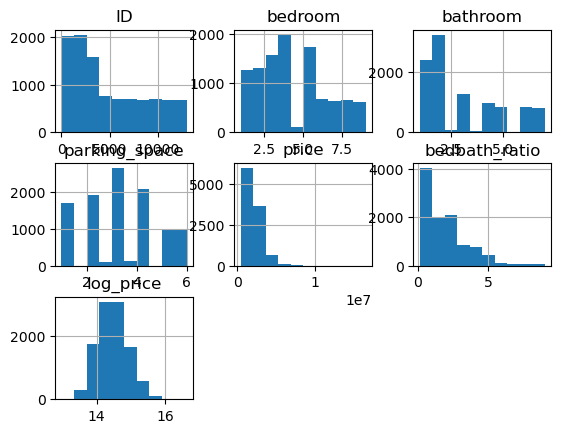

In [22]:
final_data.hist()

In [23]:
# Get all possible categories for the categoricaL columns
cat_col = ['loc', 'title']
for name in cat_col:
    print(name,':')
    print(raw_data[name].value_counts(),'\n')

loc :
Cross River    317
Imo            311
Anambra        310
Benue          309
Kaduna         309
Yobe           307
Zamfara        307
Borno          306
Plateau        301
Kano           301
Oyo            301
Ondo           300
Ogun           298
Ebonyi         298
Niger          297
Gombe          296
Kebbi          295
Nasarawa       295
Katsina        292
Jigawa         289
Enugu          288
Bauchi         288
Sokoto         287
Ekiti          286
Osun           286
Adamawa        285
Kwara          285
Bayelsa        284
Taraba         281
Kogi           279
Rivers         278
Delta          277
Abia           276
Lagos          274
Akwa Ibom      273
Edo            265
Name: loc, dtype: int64 

title :
Flat                    1182
Apartment               1147
Townhouse               1139
Semi-detached duplex    1133
Mansion                 1125
Detached duplex         1115
Penthouse               1103
Bungalow                1102
Terrace duplex          1095
Cottage        

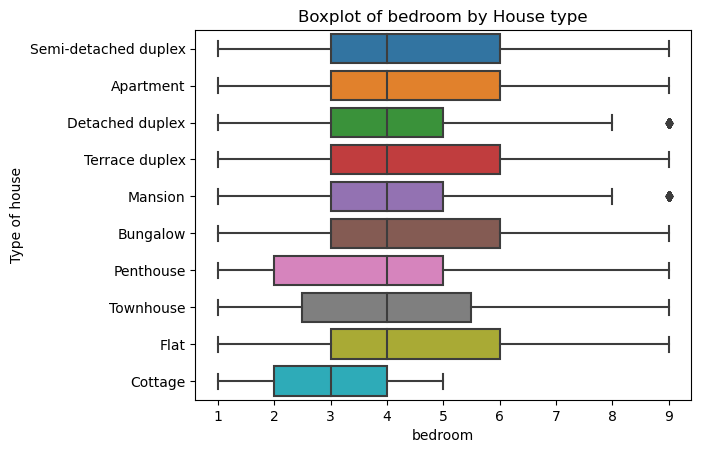

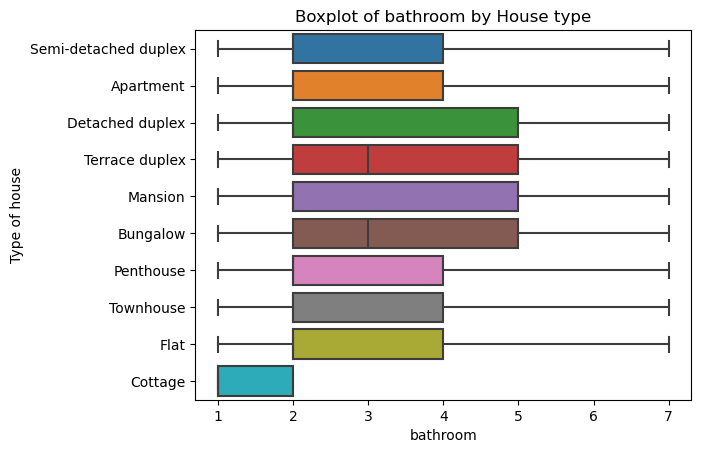

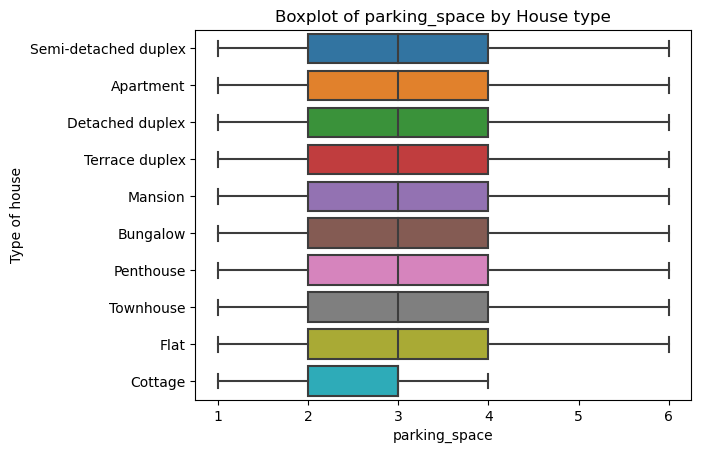

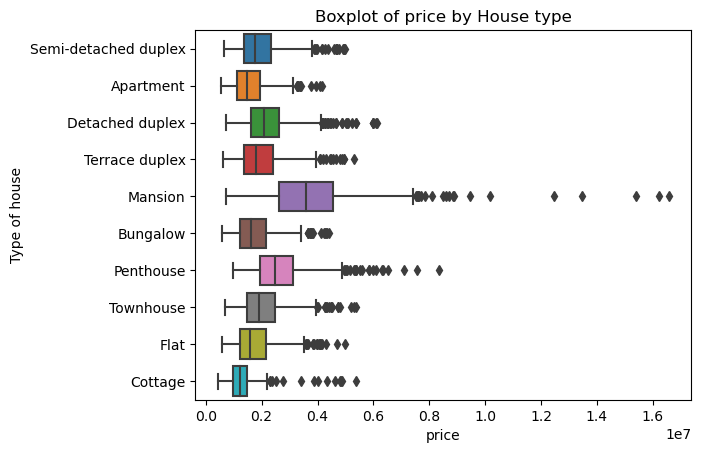

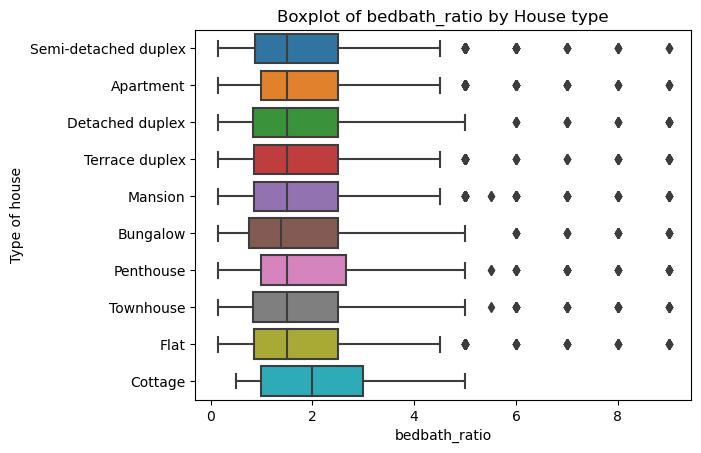

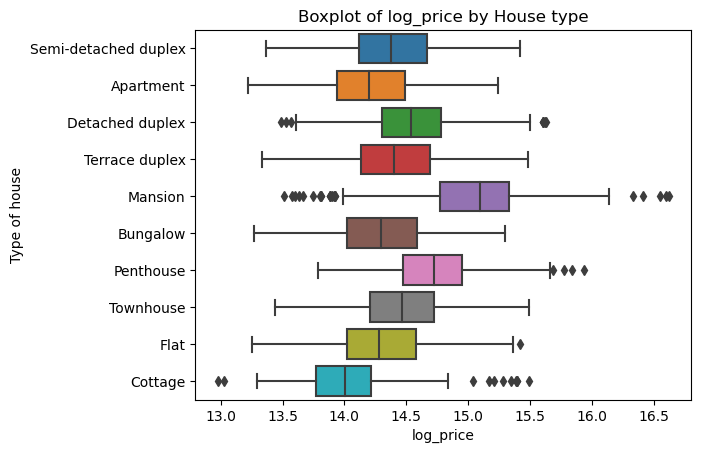

In [24]:
#shows relationship between other columns and type of house
for col in columns[3:9]:
    sns.boxplot(data=final_data, x=col, y='title')
    plt.title('Boxplot of {} by House type'.format(col))
    plt.xlabel('{}'.format(col))
    plt.ylabel('Type of house')
    plt.show()

[]

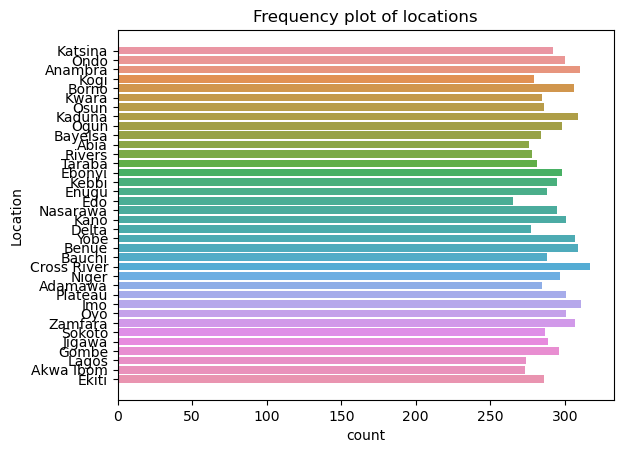

In [25]:
#count of rows by location
sns.countplot(data=final_data, y='loc' )
plt.title("Frequency plot of locations")
plt.ylabel("Location")
plt.plot()

[]

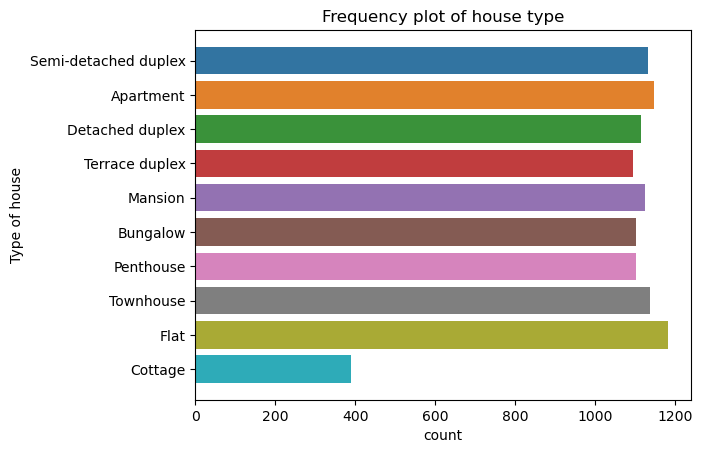

In [26]:
#count of rows by type of house
sns.countplot(data=final_data, y='title')
plt.title("Frequency plot of house type")
plt.ylabel("Type of house")
plt.plot()

[]

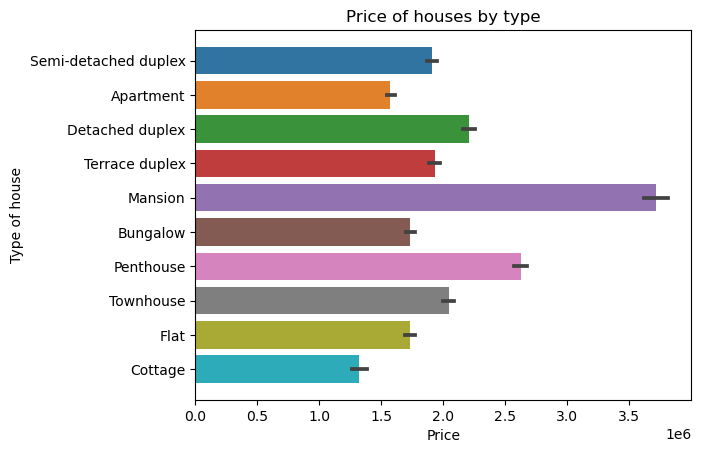

In [27]:
#relationship between house type and price
sns.barplot(data=final_data, y='title', x='price')
plt.title("Price of houses by type")
plt.ylabel("Type of house")
plt.xlabel("Price")
plt.plot()

[]

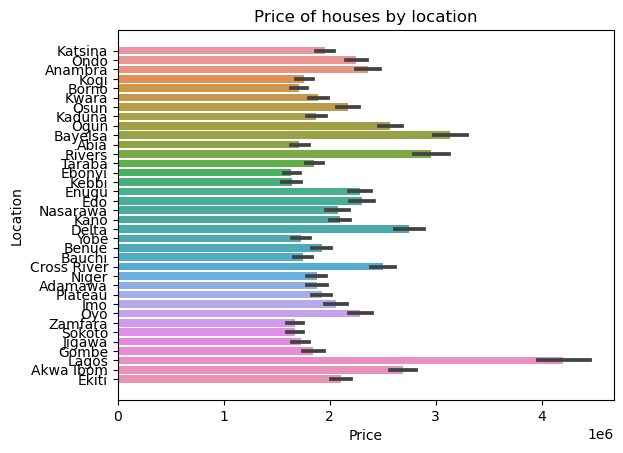

In [28]:
#Relationship between location and price
sns.barplot(data=final_data, y='loc', x='price')
plt.title("Price of houses by location")
plt.ylabel("Location")
plt.xlabel("Price")
plt.plot()

[]

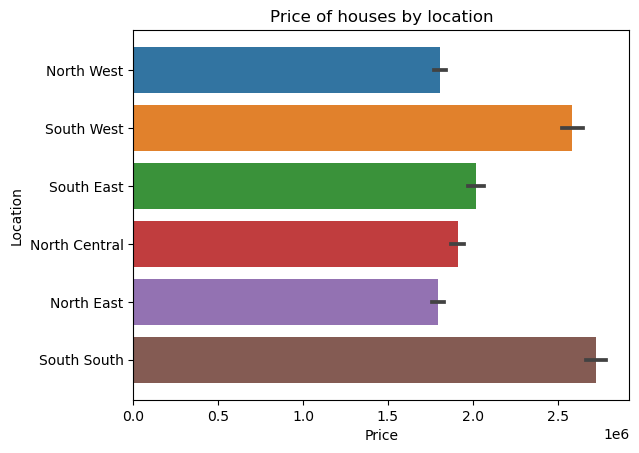

In [29]:
#Relationship between zone and price
sns.barplot(data=final_data, y='zone', x='price')
plt.title("Price of houses by location")
plt.ylabel("Location")
plt.xlabel("Price")
plt.plot()

[]

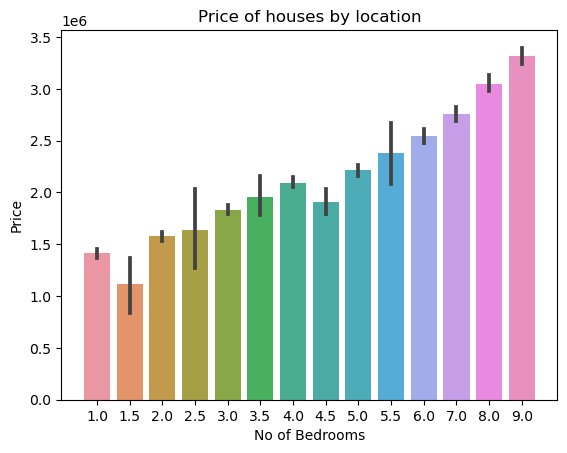

In [30]:
#relationship between no of bedroom and price
sns.barplot(data=final_data, x='bedroom', y='price')
plt.title("Price of houses by location")
plt.xlabel("No of Bedrooms")
plt.ylabel("Price")
plt.plot()

<Axes: >

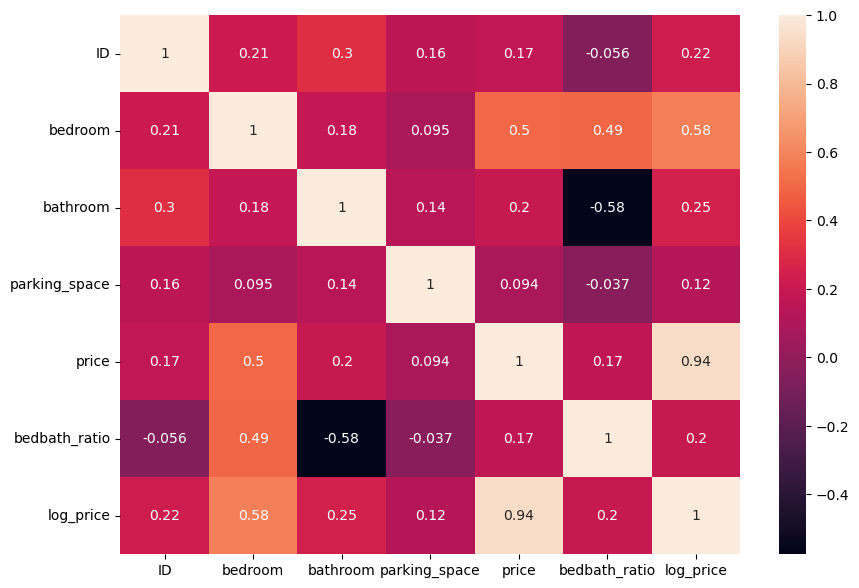

In [31]:
#plotting corr map
corr = final_data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(corr, annot=True)

# Data Processing

In [32]:
# Define the ranking based on size (arranged from smallest to biggest)
house_type_ranks = {
    'Cottage': 1,
    'Bungalow': 2,
    'Townhouse': 3,
    'Terrace duplex': 4,
    'Detached duplex': 5,
    'Semi-detached duplex': 6,
    'Flat': 7,
    'Penthouse': 8,
    'Apartment': 9,
    'Mansion': 10
}

# Map the house types to numerical values based on size ranking
final_data['title'] = final_data['title'].map(house_type_ranks)
test_data['title'] = test_data['title'].map(house_type_ranks)

# Print the updated dataframe
final_data.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,bedbath_ratio,log_price,zone
0,3583,Katsina,6,2.0,2.0,1.0,1149999.565,1.00,13.955272,North West
1,2748,Ondo,9,3.5,2.0,4.0,1672416.689,1.75,14.329780,South West
3,2224,Anambra,5,5.0,2.0,4.0,2410306.756,2.50,14.695265,South East
4,10300,Kogi,4,5.0,5.0,6.0,2600700.898,1.00,14.771292,North Central
5,1733,Borno,10,4.0,1.0,3.0,1341750.867,4.00,14.109486,North East


In [33]:
# Calculate the frequency of each category in the 'loc' and 'zone' columns
loc_frequencies = final_data['loc'].value_counts(normalize=True)
zone_frequencies = final_data['zone'].value_counts(normalize=True)
testloc_frequencies = test_data['loc'].value_counts(normalize=True)
testzone_frequencies = test_data['zone'].value_counts(normalize=True)
# Create a dictionary to map each category to its corresponding frequency
loc_frequency_mapping = loc_frequencies.to_dict()
zone_frequency_mapping = zone_frequencies.to_dict()
testloc_frequency_mapping = testloc_frequencies.to_dict()
testzone_frequency_mapping = testzone_frequencies.to_dict()
# Map the 'loc' and 'zone' columns to their corresponding frequency values
final_data['loc'] = final_data['loc'].map(loc_frequency_mapping)
final_data['zone'] = final_data['zone'].map(zone_frequency_mapping)
test_data['loc'] = test_data['loc'].map(testloc_frequency_mapping)
test_data['zone'] = test_data['zone'].map(testzone_frequency_mapping)
# Print the updated dataframe
final_data.head()


,ID,loc,title,bedroom,bathroom,parking_space,price,bedbath_ratio,log_price,zone
0,3583,0.027728,6,2.0,2.0,1.0,1149999.565,1.00,13.955272,0.197512
1,2748,0.028487,9,3.5,2.0,4.0,1672416.689,1.75,14.329780,0.165701
3,2224,0.029437,5,5.0,2.0,4.0,2410306.756,2.50,14.695265,0.140822
4,10300,0.026493,4,5.0,5.0,6.0,2600700.898,1.00,14.771292,0.167695
5,1733,0.029057,10,4.0,1.0,3.0,1341750.867,4.00,14.109486,0.167411


# Modeling

In [34]:
#importing necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from catboost import CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor

import warnings
warnings.filterwarnings('ignore')

In [35]:
# dropping columns not needed and setting the feature and label
not_needed = ['ID', 'price', 'log_price']
X = final_data.drop(columns = not_needed, axis = 1)
y = final_data.price

In [36]:
# split data for training and testing with ratio 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=48)

# CatBoost Regressor

In [37]:
#creating the model function
catb_model= CatBoostRegressor(verbose=0)

#model fitting
catb_model.fit(X_train, y_train)

#prediction
catb_pred= catb_model.predict(X_test)

#checking the mean squared error
print(f'mse = {mean_squared_error(y_test, catb_pred, squared=False)}')

#prediction
catb_pred

mse = 449222.75048238557


array([2082009.9704674 , 3615585.17787828,  787176.98997589, ...,
       1646042.51827609, 1595895.30162039, 3471072.6453907 ])

# LGBMRegressor

In [38]:
#creating the model function
lgb_model = LGBMRegressor()

#model fitting
lgb_model.fit(X_train, y_train)

#prediction
lgb_pred= lgb_model.predict(X_test)

#checking the mean squared error
print(f'mse = {mean_squared_error(y_test, lgb_pred, squared=False)}')

#printing the prediction
lgb_pred

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 7898, number of used features: 7
[LightGBM] [Info] Start training from score 2133402.757573
mse = 454538.5565924271


array([2087185.39389156, 3510499.93726923,  873502.0299293 , ...,
       1664207.29717665, 1678145.0768476 , 3052818.75550529])

In [ ]:
params = {
    'n_estimators': 600,
    'colsample_bytree': 0.86,
 'learning_rate': 0.035,
 'max_depth': 7,
 'subsample': 0.85}

test_pred=[]
y_pred = []

fold = KFold(n_splits=8, shuffle=True)#15#5#10
i=1
for train_index, test_index in fold.split(X,y):     
  
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = np.log1p(y.iloc[train_index]), y.iloc[test_index]

    model = LGBMRegressor(**params, objective = "rmse")
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)])#erly100

    preds= model.predict(X_test)
    print("err: ",(mean_squared_error(y_test,np.expm1(preds), squared=False)))  #Reverse transformation
    y_pred.append(mean_squared_error(y_test,np.expm1(preds),squared=False))
    t_pred = model.predict(test_data[X.columns])
    test_pred.append(np.expm1(t_pred))
    
print(np.mean(y_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 144
[LightGBM] [Info] Number of data points in the train set: 9214, number of used features: 7
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 14.463752
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num

In [ ]:
submission.head()

In [ ]:
submission['price'] =  np.mean(test_pred, axis = 0)

In [ ]:
submission.head()

In [ ]:
sub.to_csv('Submission.csv', index=False)